# Overall Code

In [1]:
remove(list = ls())

In [2]:
library(dplyr)
library(glmnet)
library(xtable)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-10



## Part 1: Data Preprocessing

### 1.1 Dataset Overview

In [3]:
BodyFat = read.csv("BodyFat.csv") # raw dataset: BodyFat
head(BodyFat, n=5)

IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
str(BodyFat)

'data.frame':	252 obs. of  17 variables:
 $ IDNO     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ BODYFAT  : num  12.6 6.9 24.6 10.9 27.8 20.6 19 12.8 5.1 12 ...
 $ DENSITY  : num  1.07 1.09 1.04 1.08 1.03 ...
 $ AGE      : int  23 22 22 26 24 24 26 25 25 23 ...
 $ WEIGHT   : num  154 173 154 185 184 ...
 $ HEIGHT   : num  67.8 72.2 66.2 72.2 71.2 ...
 $ ADIPOSITY: num  23.7 23.4 24.7 24.9 25.6 26.5 26.2 23.6 24.6 25.8 ...
 $ NECK     : num  36.2 38.5 34 37.4 34.4 39 36.4 37.8 38.1 42.1 ...
 $ CHEST    : num  93.1 93.6 95.8 101.8 97.3 ...
 $ ABDOMEN  : num  85.2 83 87.9 86.4 100 94.4 90.7 88.5 82.5 88.6 ...
 $ HIP      : num  94.5 98.7 99.2 101.2 101.9 ...
 $ THIGH    : num  59 58.7 59.6 60.1 63.2 66 58.4 60 62.9 63.1 ...
 $ KNEE     : num  37.3 37.3 38.9 37.3 42.2 42 38.3 39.4 38.3 41.7 ...
 $ ANKLE    : num  21.9 23.4 24 22.8 24 25.6 22.9 23.2 23.8 25 ...
 $ BICEPS   : num  32 30.5 28.8 32.4 32.2 35.7 31.9 30.5 35.9 35.6 ...
 $ FOREARM  : num  27.4 28.9 25.2 29.4 27.7 30.6 27.8 29 31.1 30 ...


In [5]:
xtable(summary(BodyFat))

IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
Min. : 1.00,Min. : 0.00,Min. :0.995,Min. :22.00,Min. :118.5,Min. :29.50,Min. :18.10,Min. :31.10,Min. : 79.30,Min. : 69.40,Min. : 85.0,Min. :47.20,Min. :33.00,Min. :19.1,Min. :24.80,Min. :21.00,Min. :15.80
1st Qu.: 63.75,1st Qu.:12.80,1st Qu.:1.041,1st Qu.:35.75,1st Qu.:159.0,1st Qu.:68.25,1st Qu.:23.10,1st Qu.:36.40,1st Qu.: 94.35,1st Qu.: 84.58,1st Qu.: 95.5,1st Qu.:56.00,1st Qu.:36.98,1st Qu.:22.0,1st Qu.:30.20,1st Qu.:27.30,1st Qu.:17.60
Median :126.50,Median :19.00,Median :1.055,Median :43.00,Median :176.5,Median :70.00,Median :25.05,Median :38.00,Median : 99.65,Median : 90.95,Median : 99.3,Median :59.00,Median :38.50,Median :22.8,Median :32.05,Median :28.70,Median :18.30
Mean :126.50,Mean :18.94,Mean :1.056,Mean :44.88,Mean :178.9,Mean :70.15,Mean :25.44,Mean :37.99,Mean :100.82,Mean : 92.56,Mean : 99.9,Mean :59.41,Mean :38.59,Mean :23.1,Mean :32.27,Mean :28.66,Mean :18.23
3rd Qu.:189.25,3rd Qu.:24.60,3rd Qu.:1.070,3rd Qu.:54.00,3rd Qu.:197.0,3rd Qu.:72.25,3rd Qu.:27.32,3rd Qu.:39.42,3rd Qu.:105.38,3rd Qu.: 99.33,3rd Qu.:103.5,3rd Qu.:62.35,3rd Qu.:39.92,3rd Qu.:24.0,3rd Qu.:34.33,3rd Qu.:30.00,3rd Qu.:18.80
Max. :252.00,Max. :45.10,Max. :1.109,Max. :81.00,Max. :363.1,Max. :77.75,Max. :48.90,Max. :51.20,Max. :136.20,Max. :148.10,Max. :147.7,Max. :87.30,Max. :49.10,Max. :33.9,Max. :45.00,Max. :34.90,Max. :21.40


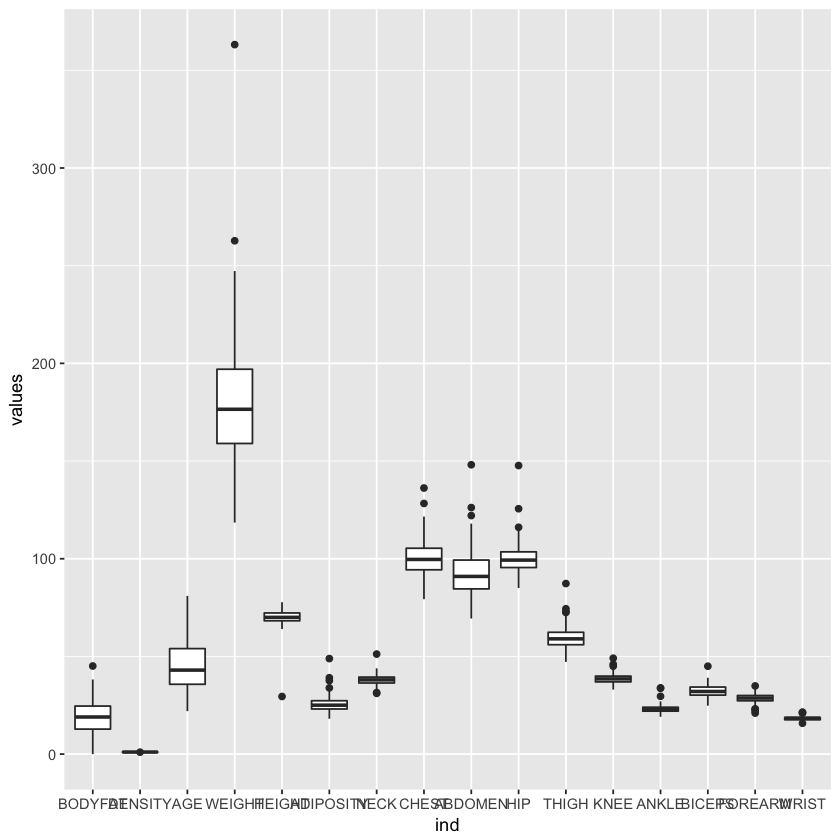

In [6]:
ggplot(stack(BodyFat[ ,-1]), aes(x = ind, y = values)) + geom_boxplot()

From the boxplot above, we can see `WEIGHT` and `HEIGHT` have obvious extremums. Later we'll check these two variables and see what's the extremums.  

Sort the dataset by each variable, we find:  

* the 39th guy is the extremum of `WEIGHT`, `ADIOPOSITY`, `NECK`, `CHEST`, `ABDOMEN`, `HIP`, `THIGH`, `KNEE` and `BICEPS`;

* the 42th guy is the extremum of `HEIGHT`;

* the 182th guy is the extremum of `DENSITY`, `WEIGHT`, `ADIOPOSITY`, `CHEST`;

* the 216th guy is the extremum of `DENSITY`;

As we all know, percent body fat `BODYFAT` and density determined from underwater weighing `DENSITY` are correlated. In fact, there's a linear relation between these two variables.  

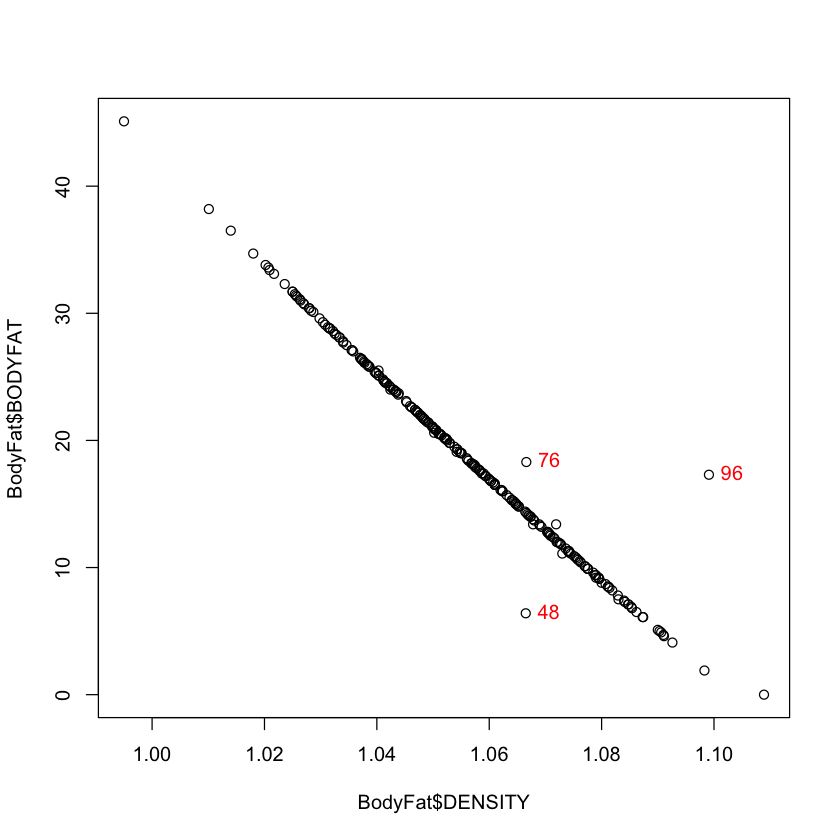

In [7]:
plot(BodyFat$BODYFAT ~ BodyFat$DENSITY)
text(BodyFat$DENSITY[c(48,76,96)], BodyFat$BODYFAT[c(48,76,96)], labels=BodyFat$IDNO[c(48,76,96)], cex=1, pos=4, col="red")

We noticed the 48th, 76th and 96th guys do not follow the linear relationship between `DENSITY` and `BODYFAT`. Since we don't know which measurement is inaccurate, we'll just remove them from the dataset.  

Also, We'll remove `DENSITY` from the dataset and use `BODYFAT` as response variable in our regression model.  

In [8]:
bodyfat = BodyFat[ ,-c(1,3)]

### 1.2 Extremum

Now, let's sort the dataset by `BODYFAT`, `WEIGHT` and `HEIGHT` and see the extremums.

* Deal with the extremum of `BODYFAT`.  

In [9]:
head(BodyFat %>% arrange(BODYFAT), n=5)
head(BodyFat %>% arrange(desc(BODYFAT)), n=5)

IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
182,0.0,1.1089,40,118.50,68.00,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5
172,1.9,1.0983,35,125.75,65.50,20.6,34.0,90.8,75.0,89.2,50.0,34.8,22.0,24.8,25.9,16.9
171,4.1,1.0926,35,152.25,67.75,23.4,37.0,92.2,81.9,92.8,54.7,36.2,22.1,30.4,27.4,17.7
26,4.6,1.0911,27,159.25,71.50,21.9,35.7,89.6,79.7,96.5,55.0,36.7,22.5,29.9,28.2,17.7
29,4.7,1.0910,27,133.25,64.75,22.4,36.4,93.5,73.9,88.5,50.1,34.5,21.3,30.5,27.9,17.2


IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
216,45.1,0.9950,51,219.00,64.00,37.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
36,38.2,1.0101,49,191.75,65.00,32.0,38.4,118.5,113.1,113.8,61.9,38.3,21.9,32.0,29.8,17.0
192,36.5,1.0140,42,244.25,76.00,29.8,41.8,115.2,113.7,112.4,68.5,45.0,25.5,37.1,31.2,19.9
169,34.7,1.0180,35,228.25,69.50,33.3,40.4,114.9,115.9,111.9,74.4,40.6,24.0,36.1,31.8,18.8
39,33.8,1.0202,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4


We noticed the 182th guy has 0.0% bodyfat, and the 216th guy has 45.1% bodyfat, these are basically impossible for human beings.

Since the relationship between `DENSITY` and `BODYFAT` is given as follows:

$$ bodyfat = \frac{495}{density} - 450 $$

<center> unit of measurements: $bodyfat(\%), density(g/cm^3)$ </center>

We can use `DENSITY` to calculate bodyfat, and compare it with `BODYFAT` given by the dataset. 

In [10]:
BodyFat$cal_fat = 495 / BodyFat$DENSITY - 450

People whose `BODYFAT` and calculated bodyfat differs greatly list following:

In [11]:
index = order(abs(BodyFat$cal_fat - BodyFat$BODYFAT), decreasing = TRUE)[1:5]
BodyFat[index, c(2,3,18)]

,BODYFAT,DENSITY,cal_fat
96,17.3,1.0991,0.3684833
48,6.4,1.0665,14.1350211
76,18.3,1.0666,14.0915057
182,0.0,1.1089,-3.6116873
216,45.1,0.9950,47.4874372


The 96th, 48th and 76th guys have been deleted in the former analysis. The calculated bodyfat for the 182th guy is negative and is impossible, so we remove him. The calculated bodyfat for the 216th guy is close to its `BODYFAT` in the dataset and is too much for a human, moreover, his `DENSITY` is smaller than water, so we remove him too.

* Deal with the extremum of `WEIGHT`.

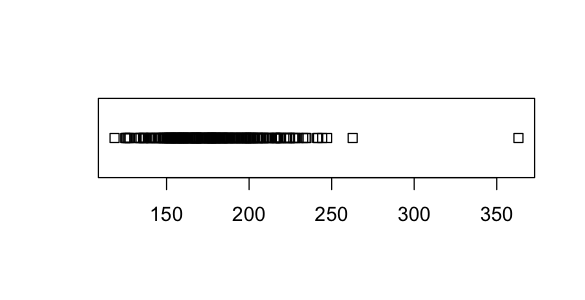

In [12]:
options(repr.plot.width=4.875, repr.plot.height=2.5)
stripchart(BodyFat$WEIGHT)

We noticed there is a guy weights larger than 350 lbs.

In [13]:
BodyFat[which.max(BodyFat$WEIGHT), ]  # the highest weight guy

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,cal_fat
39,39,33.8,1.0202,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45,29,21.4,35.19898


It is obvious that the highest weight guy has an unormal weight. We tried to recover the weight from his BMI and height, that is, `ADIPOSITY` and `HEIGHT` from the dataset. 

The BMI calculation formula is: 
$$ BMI = \frac{weight}{height^2} $$  
<center> unit of measurements: $weight(kg), height(m)$ </center>

In [14]:
weight_kg_39 = 48.9 * (72.25 * 2.54 / 100)^2 # the 39th guy's weight in kg
(weight_lb_39 = weight_kg_39 / 0.45359237)   # the 39th guy's weight in lb

[1] 363.0666

It's almost the same as his `WEIGHT` from the dataset, which means the data is the true value. And because it's too extreme and not representative, we can just remove the 39th guy.

* Deal with the extremum of `HEIGHT`

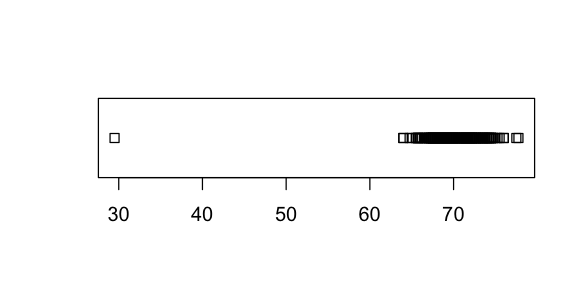

In [15]:
options(repr.plot.width=4.875, repr.plot.height=2.5)
stripchart(BodyFat$HEIGHT)

In [16]:
BodyFat[which.min(BodyFat$HEIGHT), ]  # the lowest height guy

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,cal_fat
42,42,31.7,1.025,44,205,29.5,29.9,36.6,106,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4,32.92683


In [17]:
height_m_42 =  sqrt( 205 * 0.45359237 / 29.9) # the 42th guy's height in m
(height_inch_42 = height_m_42 * 100 / 2.54)   # the 42th guy's height in inch

[1] 69.42893

So we can recover his height from his BMI and weight record. And the height for the 42th guy should be around 69.4 inches.

In [18]:
bodyfat$HEIGHT[42] = 69.4
bodyfat = bodyfat[-c(48,76,96,182,216,39), ] # dataset we used: bodyfat

### 1.3 Leverages

In [19]:
str(bodyfat)

'data.frame':	246 obs. of  15 variables:
 $ BODYFAT  : num  12.6 6.9 24.6 10.9 27.8 20.6 19 12.8 5.1 12 ...
 $ AGE      : int  23 22 22 26 24 24 26 25 25 23 ...
 $ WEIGHT   : num  154 173 154 185 184 ...
 $ HEIGHT   : num  67.8 72.2 66.2 72.2 71.2 ...
 $ ADIPOSITY: num  23.7 23.4 24.7 24.9 25.6 26.5 26.2 23.6 24.6 25.8 ...
 $ NECK     : num  36.2 38.5 34 37.4 34.4 39 36.4 37.8 38.1 42.1 ...
 $ CHEST    : num  93.1 93.6 95.8 101.8 97.3 ...
 $ ABDOMEN  : num  85.2 83 87.9 86.4 100 94.4 90.7 88.5 82.5 88.6 ...
 $ HIP      : num  94.5 98.7 99.2 101.2 101.9 ...
 $ THIGH    : num  59 58.7 59.6 60.1 63.2 66 58.4 60 62.9 63.1 ...
 $ KNEE     : num  37.3 37.3 38.9 37.3 42.2 42 38.3 39.4 38.3 41.7 ...
 $ ANKLE    : num  21.9 23.4 24 22.8 24 25.6 22.9 23.2 23.8 25 ...
 $ BICEPS   : num  32 30.5 28.8 32.4 32.2 35.7 31.9 30.5 35.9 35.6 ...
 $ FOREARM  : num  27.4 28.9 25.2 29.4 27.7 30.6 27.8 29 31.1 30 ...
 $ WRIST    : num  17.1 18.2 16.6 18.2 17.7 18.8 17.7 18.8 18.2 19.2 ...


The modified dataset has 246 observations and 15 variables now.  
Let's fit a Multiple Linear Regression model and find out the possible outliers and leverages.

In [20]:
model = lm(BODYFAT ~ ., data = bodyfat)
summary(model)


Call:
lm(formula = BODYFAT ~ ., data = bodyfat)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9885 -2.8310 -0.0517  2.7603  9.2289 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -15.44663   38.18531  -0.405 0.686206    
AGE           0.06412    0.02979   2.152 0.032395 *  
WEIGHT       -0.06773    0.10706  -0.633 0.527588    
HEIGHT        0.09319    0.53047   0.176 0.860708    
ADIPOSITY     0.45740    0.77253   0.592 0.554373    
NECK         -0.37192    0.21713  -1.713 0.088067 .  
CHEST        -0.13595    0.10512  -1.293 0.197205    
ABDOMEN       0.83226    0.08662   9.608  < 2e-16 ***
HIP          -0.18378    0.13547  -1.357 0.176244    
THIGH         0.17237    0.13811   1.248 0.213273    
KNEE         -0.01454    0.23032  -0.063 0.949733    
ANKLE         0.14822    0.20727   0.715 0.475270    
BICEPS        0.17031    0.15861   1.074 0.284030    
FOREARM       0.24777    0.19319   1.282 0.200953    
WRIST        -1.70314    0.49488

Since anything above $\frac{4}{n-p}$ can be classified as leverages, plot the Cook's distance and see who may be leverages.

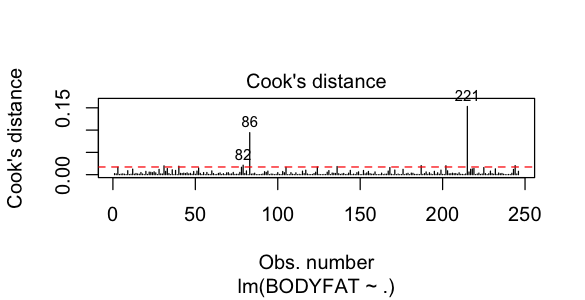

In [21]:
plot(model, which = 4)
abline(h = 4 /(246 - 14), lty = 2, col = "red")

In [22]:
BodyFat[c(82,86,221), ]

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,cal_fat
82,82,26.0,1.0382,64,150.25,67.25,23.4,38.1,97.1,89.0,96.9,54.8,38.0,22.0,29.9,25.2,17.7,26.78675
86,86,25.8,1.0386,67,167.00,67.50,26.0,36.5,98.9,89.7,96.2,54.7,37.8,33.7,32.4,27.7,18.2,26.60312
221,221,12.7,1.0706,54,153.25,70.50,24.5,38.5,99.0,91.8,96.2,57.7,38.1,23.9,31.4,29.9,18.9,12.35756


From the Cook's distance plot we can see 3 potential leverages in the model. However, we can not find any reason to remove them from the model so we keep them as natural data.

## Part 2: Model fitting

### 2.1 BIC

In [23]:
model.full = lm(BODYFAT ~ ., data = bodyfat)

In [24]:
model.bic.both = step(model.full, direction = "both", k = log(dim(bodyfat)[2]))

Start:  AIC=698.47
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- KNEE       1      0.06 3567.2 695.77
- HEIGHT     1      0.48 3567.6 695.80
- ADIPOSITY  1      5.41 3572.6 696.14
- WEIGHT     1      6.18 3573.3 696.19
- ANKLE      1      7.90 3575.1 696.31
- BICEPS     1     17.81 3585.0 696.99
- THIGH      1     24.05 3591.2 697.42
- FOREARM    1     25.40 3592.6 697.51
- CHEST      1     25.83 3593.0 697.54
- HIP        1     28.42 3595.6 697.72
<none>                   3567.2 698.47
- NECK       1     45.31 3612.5 698.87
- AGE        1     71.55 3638.7 700.65
- WRIST      1    182.90 3750.1 708.07
- ABDOMEN    1   1425.68 4992.8 778.48

Step:  AIC=695.77
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- HEIGHT     1      0.46 3567.7 693.09


In [25]:
model.bic.backward = step(model.full, direction = "backward", k = log(dim(BodyFat)[2]))

Start:  AIC=701.21
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- KNEE       1      0.06 3567.2 698.32
- HEIGHT     1      0.48 3567.6 698.35
- ADIPOSITY  1      5.41 3572.6 698.69
- WEIGHT     1      6.18 3573.3 698.74
- ANKLE      1      7.90 3575.1 698.86
- BICEPS     1     17.81 3585.0 699.54
- THIGH      1     24.05 3591.2 699.97
- FOREARM    1     25.40 3592.6 700.06
- CHEST      1     25.83 3593.0 700.09
- HIP        1     28.42 3595.6 700.27
<none>                   3567.2 701.21
- NECK       1     45.31 3612.5 701.42
- AGE        1     71.55 3638.7 703.20
- WRIST      1    182.90 3750.1 710.62
- ABDOMEN    1   1425.68 4992.8 781.03

Step:  AIC=698.32
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- HEIGHT     1      0.46 3567.7 695.46


In [26]:
model.null = lm(BODYFAT ~ 1, data = bodyfat)

In [27]:
model.bic.forward = step(model.null, direction = "forward", k = log(dim(bodyfat)[2]), scope = formula(model.full))

Start:  AIC=990.77
BODYFAT ~ 1

            Df Sum of Sq     RSS    AIC
+ ABDOMEN    1    9082.4  4572.1 724.33
+ ADIPOSITY  1    7230.8  6423.7 807.97
+ CHEST      1    6458.6  7196.0 835.90
+ HIP        1    5305.7  8348.9 872.46
+ WEIGHT     1    5115.1  8539.4 878.01
+ THIGH      1    4102.0  9552.6 905.59
+ KNEE       1    3598.1 10056.4 918.23
+ BICEPS     1    3037.4 10617.1 931.58
+ NECK       1    2954.1 10700.4 933.50
+ FOREARM    1    1731.4 11923.2 960.12
+ WRIST      1    1486.2 12168.3 965.13
+ AGE        1    1162.1 12492.5 971.59
+ ANKLE      1     734.0 12920.5 979.88
<none>                   13654.5 990.77
+ HEIGHT     1       0.1 13654.5 993.47

Step:  AIC=724.33
BODYFAT ~ ABDOMEN

            Df Sum of Sq    RSS    AIC
+ WEIGHT     1    574.35 3997.8 694.01
+ WRIST      1    540.95 4031.2 696.06
+ HEIGHT     1    422.36 4149.7 703.19
+ NECK       1    382.42 4189.7 705.55
+ HIP        1    264.49 4307.6 712.37
+ CHEST      1    198.01 4374.1 716.14
+ KNEE       1   

In [28]:
summary(model.bic.both)


Call:
lm(formula = BODYFAT ~ AGE + ADIPOSITY + CHEST + ABDOMEN + WRIST, 
    data = bodyfat)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4828 -2.6995 -0.3002  3.0760  8.9638 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.26015    5.83125  -0.559 0.576627    
AGE          0.07558    0.02140   3.531 0.000495 ***
ADIPOSITY    0.47195    0.22789   2.071 0.039436 *  
CHEST       -0.20984    0.08891  -2.360 0.019073 *  
ABDOMEN      0.71224    0.07131   9.989  < 2e-16 ***
WRIST       -2.07723    0.36821  -5.641 4.73e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.952 on 240 degrees of freedom
Multiple R-squared:  0.7254,	Adjusted R-squared:  0.7197 
F-statistic: 126.8 on 5 and 240 DF,  p-value: < 2.2e-16


In [29]:
summary(model.bic.backward)


Call:
lm(formula = BODYFAT ~ AGE + ADIPOSITY + CHEST + ABDOMEN + WRIST, 
    data = bodyfat)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4828 -2.6995 -0.3002  3.0760  8.9638 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.26015    5.83125  -0.559 0.576627    
AGE          0.07558    0.02140   3.531 0.000495 ***
ADIPOSITY    0.47195    0.22789   2.071 0.039436 *  
CHEST       -0.20984    0.08891  -2.360 0.019073 *  
ABDOMEN      0.71224    0.07131   9.989  < 2e-16 ***
WRIST       -2.07723    0.36821  -5.641 4.73e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.952 on 240 degrees of freedom
Multiple R-squared:  0.7254,	Adjusted R-squared:  0.7197 
F-statistic: 126.8 on 5 and 240 DF,  p-value: < 2.2e-16


In [30]:
summary(model.bic.forward)


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST + BICEPS, data = bodyfat)

Residuals:
   Min     1Q Median     3Q    Max 
-9.134 -2.800 -0.177  2.973  8.614 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -26.55869    6.48576  -4.095 5.77e-05 ***
ABDOMEN       0.88326    0.05237  16.866  < 2e-16 ***
WEIGHT       -0.10549    0.02571  -4.103 5.59e-05 ***
WRIST        -1.42364    0.40282  -3.534  0.00049 ***
BICEPS        0.26726    0.14130   1.891  0.05976 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.954 on 241 degrees of freedom
Multiple R-squared:  0.7241,	Adjusted R-squared:  0.7195 
F-statistic: 158.1 on 4 and 241 DF,  p-value: < 2.2e-16


Compare the 3 models built by stepwise variable selection(both/backward/forward) with BIC criterion, the model generated by forward selection $model.bic.forward$ has the least number of variables.  

The model $model.bic.forward$ has 4 variables, in which the variable `BICEPS` is less significant. In order to get a more simplified model, we refit the model excluding `BICEPS`.

In [31]:
model_BIC = lm(BODYFAT ~ ABDOMEN + WEIGHT + WRIST, data = bodyfat)
summary(model_BIC)


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST, data = bodyfat)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0089 -2.8917 -0.4071  2.9887  9.2327 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -22.90319    6.22402  -3.680 0.000288 ***
ABDOMEN       0.87320    0.05237  16.672  < 2e-16 ***
WEIGHT       -0.08140    0.02245  -3.625 0.000352 ***
WRIST        -1.33584    0.40227  -3.321 0.001036 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.975 on 242 degrees of freedom
Multiple R-squared:   0.72,	Adjusted R-squared:  0.7165 
F-statistic: 207.4 on 3 and 242 DF,  p-value: < 2.2e-16


Since the R-squared decreases just a little after we refit the model, $model\_BIC$ is what we got by stepwise variable selection with BIC criterion:

$$ Bodyfat = -22.90319 + 0.87320 * Abdomen - 0.08140 * Weight - 1.33584 * Wrist $$

### 2.2 LASSO

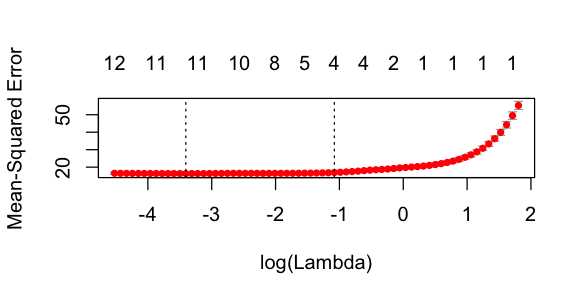

In [32]:
x = as.matrix(bodyfat[ ,-1])
y = bodyfat[ ,1]
cvfit = cv.glmnet(x, y, family = "gaussian", type.measure = "mse", nfolds = 10, alpha = 1, standardize = T)
plot(cvfit)

In [33]:
print(coef(cvfit, s = "lambda.min"))
print(coef(cvfit, s = "lambda.1se"))

15 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept)  5.50924784
AGE          0.06089092
WEIGHT       .         
HEIGHT      -0.24983757
ADIPOSITY    .         
NECK        -0.32942909
CHEST       -0.09231289
ABDOMEN      0.77651419
HIP         -0.10229566
THIGH        0.10823672
KNEE         .         
ANKLE        0.08719378
BICEPS       0.12863671
FOREARM      0.19874708
WRIST       -1.63475271
15 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept) -8.03831904
AGE          0.02616219
WEIGHT       .         
HEIGHT      -0.23063451
ADIPOSITY    .         
NECK         .         
CHEST        .         
ABDOMEN      0.62885043
HIP          .         
THIGH        .         
KNEE         .         
ANKLE        .         
BICEPS       .         
FOREARM      .         
WRIST       -0.88375358


Variable selection method LASSO selects 4 variables: `AGE`, `HEIGHT`, `ABDOMEN`, `WRIST`. Fit a Multiple Linear Regression model with these variables as follows:

In [34]:
model_LASSO = lm(BODYFAT ~ AGE + HEIGHT + ABDOMEN + WRIST, data = bodyfat)
summary(model_LASSO)


Call:
lm(formula = BODYFAT ~ AGE + HEIGHT + ABDOMEN + WRIST, data = bodyfat)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5667 -2.8318 -0.3704  2.9634  8.7839 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.34367    7.75355   0.431   0.6667    
AGE          0.04971    0.02219   2.240   0.0260 *  
HEIGHT      -0.27208    0.11560  -2.354   0.0194 *  
ABDOMEN      0.70838    0.03204  22.112  < 2e-16 ***
WRIST       -1.80984    0.37884  -4.777 3.09e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.954 on 241 degrees of freedom
Multiple R-squared:  0.724,	Adjusted R-squared:  0.7194 
F-statistic:   158 on 4 and 241 DF,  p-value: < 2.2e-16


Variable `AGE` is less significant in $model\_LASSO$. In order to get a more simplified model, we refit the model excluding `AGE`.

In [35]:
model_LASSO_final = lm(BODYFAT ~ HEIGHT + ABDOMEN + WRIST, data = bodyfat)
summary(model_LASSO_final)


Call:
lm(formula = BODYFAT ~ HEIGHT + ABDOMEN + WRIST, data = bodyfat)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0606 -2.9026 -0.2629  2.8771  9.1615 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.02851    7.52795   1.066 0.287263    
HEIGHT      -0.36820    0.10824  -3.402 0.000783 ***
ABDOMEN      0.71895    0.03195  22.504  < 2e-16 ***
WRIST       -1.62740    0.37304  -4.363  1.9e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.987 on 242 degrees of freedom
Multiple R-squared:  0.7182,	Adjusted R-squared:  0.7148 
F-statistic: 205.6 on 3 and 242 DF,  p-value: < 2.2e-16


Since the R-squared decreases just a little after we refit the model, $model\_LASSO\_final$ is what we built by variable selection method LASSO:

$$ Bodyfat = 8.02851 - 0.36820 * Height + 0.71895 * Abdomen - 1.62740 * Wrist $$

Compare the multiple R-squared of the 2 models we got:

* $model\_BIC$: 0.72

* $model\_LASSO\_final$: 0.7182

$model\_BIC$ has larger multiple R-squared, so we choose it as our final model.

## Part 3: Model Evaluation

### 3.1 Summary of Estimation and Inference

Our final model is:  

$$ Bodyfat = -22.90319 + 0.87320 * Abdomen - 0.08140 * Weight - 1.33584 * Wrist $$

In [36]:
summary(model_BIC)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-22.90319063,6.22402308,-3.679805,2.877312e-04
ABDOMEN,0.87319758,0.05237493,16.672052,4.504113e-42
WEIGHT,-0.08140137,0.02245467,-3.625142,3.520444e-04
WRIST,-1.33584448,0.40226546,-3.320803,1.036233e-03


The final model contains 3 variables: **Abdomen**, **Weight** and **Wrist**. The Multiple R-squared for this model is 0.72, which means these 3 variables can explain about 72% variability of the bodyfat.  

When consider F-test for null hypothesis: $\beta_1 = \beta_2 = \beta_3 = 0$, the corresponding p-value is less than $2.2e^{-16}$. So we reject the null hypothesis.

For the coefficients for the 3 variables, when testing for null hypothesis: $\beta_i=0$,  the p-values for each test is very significant (less than 0.01). This means the possibility for falsely rejecting each null hypothesis is less than 0.01.  

We can also further check the 95% confidence intervals which list following:  

In [37]:
confint(model_BIC)

,2.5 %,97.5 %
(Intercept),-35.1633655,-10.64301576
ABDOMEN,0.7700287,0.97636651
WEIGHT,-0.1256329,-0.03716982
WRIST,-2.1282331,-0.54345588


None of the confidence intervals for the 3 variables including 0, which also support that the 3 coefficients are not 0.

### 3.2  Model Diagnosis

In this part, we check 3 assumptions of a Multiple Linear Regression model by using diagnostic plots.

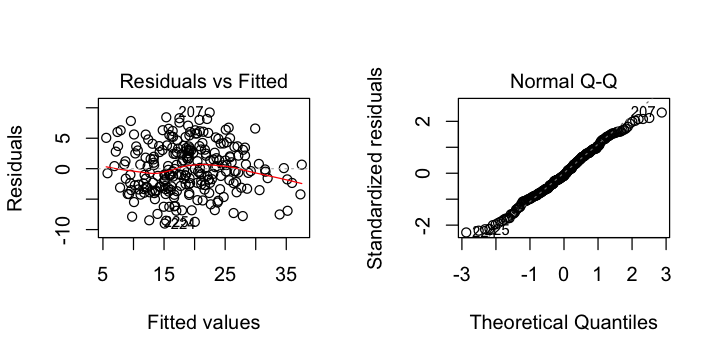

In [38]:
options(repr.plot.width=6, repr.plot.height=3)
par(mfrow = c(1,2))
plot(model_BIC, which = 1:2)

* Normality.  
From the Normal Q-Q plot, the residuals may have a heavy right tail, but in general, the points line on the diagonal can support the normality.  
We also used the Shapiro-Wilk normality test to check the normality, which gets a p-value of 0.09072. So we can not reject the normality assumption.

In [39]:
shapiro.test(model_BIC$residuals)


	Shapiro-Wilk normality test

data:  model_BIC$residuals
W = 0.99006, p-value = 0.09072


* Equal variance.  
From the Residuals vs Fitted plot, the variance of residuals are approximately equal.

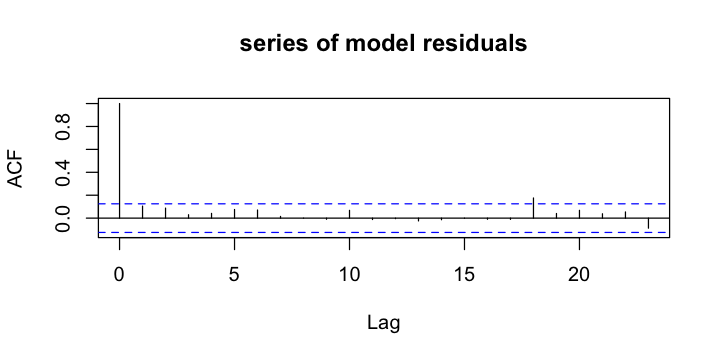

In [40]:
acf(model_BIC$residuals, main="series of model residuals")

* Independence.  
We calculated the autocorrelation of the residuals. It shows that for all lags, the autocorrelation are inside the critical bound. So the independece assumption is satisfied.

### 3.3 Laymen’s Interpretation

The approximate of final model is: 

$$ Bodyfat = -23 + 0.9 * Abdomen - 0.08 * Weight - 1.3 * Wrist $$

That is, when fixing other two variables, 1cm increasment in **Abdomen** leads to 0.9 increasment in Bodyfat; 10 lbs increasment in **Weight** leads to 0.8 decreasment in Bodyfat; 1cm increasment in **Wrist** leads to 1.3 decreasment in Bodyfat.